# Rain on Sint Eustatius

this is my first attempt at doing something with jupyter notebooks.  I'm not
so sure what would be useful, or interesting, so I'm just experimenting with
old data, from a weather station in Pleasures, Sint Eustatius.

this notebook shows individual rain readings as bars, and a running sum over
a period of seven days.  as you can see, there is hardly any yearly pattern
in rainfall on the island.  very roughly, the months February to May are the
driest, and the months in the hurricane season are the ones with most chance
of rain.  but during a year hurricanes can just completely miss the island,
and in an other year you can have an active rain cell hitting the island in
a supposedly dry month.

it is a very difficult place for doing any agriculture!

In [227]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

In [228]:
raw_data = pd.read_csv('raindata-day.csv', comment='#')
timestamped_data = pd.DataFrame({'mm': raw_data.mm.values},
                                index=pd.to_datetime(raw_data.date, dayfirst=True))

In [229]:
def plot_year(year, bootstrap={}):
    '''use the global timestamped_data to plot a year

    return the last value of the 7 days running sum, and the yearly data.
    '''

    from datetime import datetime, timedelta
    # build the empty DataFrame
    duration = 365 + (year % 4 == 0 and 1 or 0)
    data = pd.DataFrame(index=[datetime(year, 1, 1) + timedelta(i, 0) for i in range(duration)])
    # populate it with the relevant data
    data['mm'] = timestamped_data.mm[(timestamped_data.index >= datetime(year, 1, 1)) &
                                     (timestamped_data.index < datetime(year + 1, 1, 1))]
    # fill in the blanks (the NaNs)
    data['mm'].fillna(0, inplace=True)

    # for reference, print the yearly sum
    print('rain this year: %0.1fmm' % data['mm'].sum())
    print('rain up to July 1st: %0.1fmm' % data['mm'][:-184].sum())

    # prepare the plotting area
    plt.figure(figsize=(18, 4))

    # plot the daily readings
    plt.bar(range(data.shape[0]), data.mm, width=1.2)

    result = {}

    # construct and plot a seven days running sum.
    for window in [7]:
        a = data.mm.values
        a[0] += bootstrap.get(window, 0)
        a = a.cumsum()
        a[window:] -= a[:-window]
        result[window] = a[-1]
        plt.plot(a)

    # define a uniform top and bottom for the cumulative rain
    plt.ylim(top = 350, bottom = 0)
    result['data'] = data
    return result

rain this year: 1226.8mm
rain up to July 1st: 423.9mm


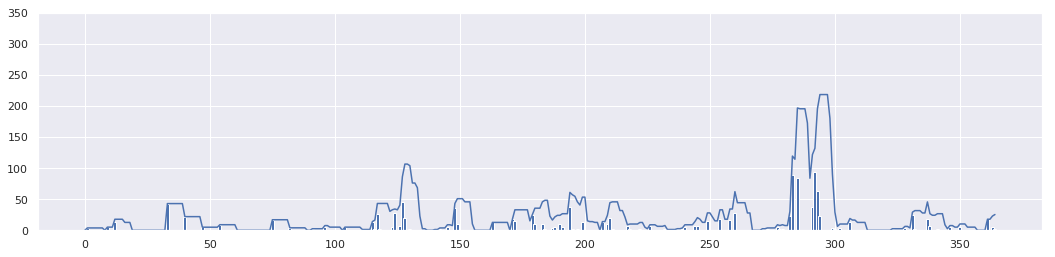

In [230]:
values = plot_year(2006);

rain this year: 943.9mm
rain up to July 1st: 331.5mm


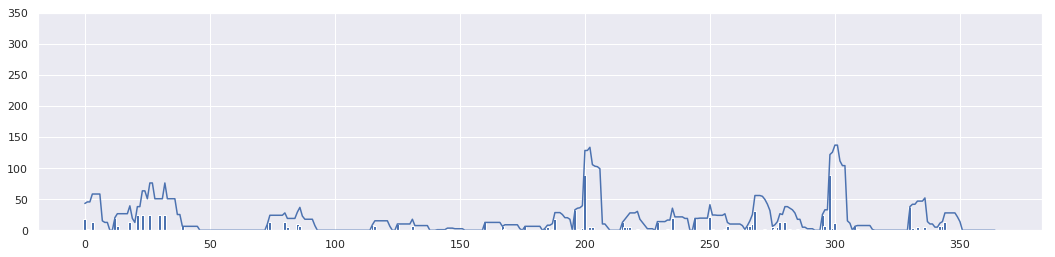

In [231]:
values = plot_year(2007, values)

rain this year: 1202.2mm
rain up to July 1st: 462.5mm


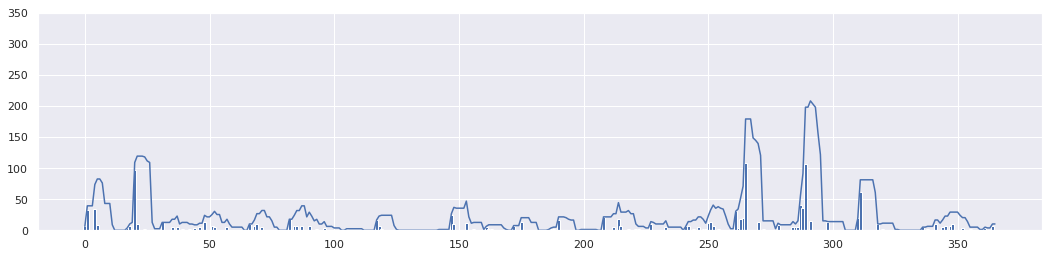

In [232]:
values = plot_year(2008, values)

rain this year: 1014.6mm
rain up to July 1st: 378.2mm


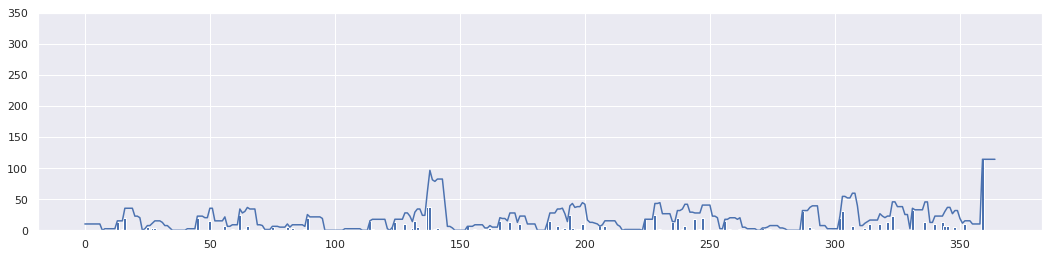

In [233]:
values = plot_year(2009, values)

rain this year: 1723.2mm
rain up to July 1st: 515.2mm


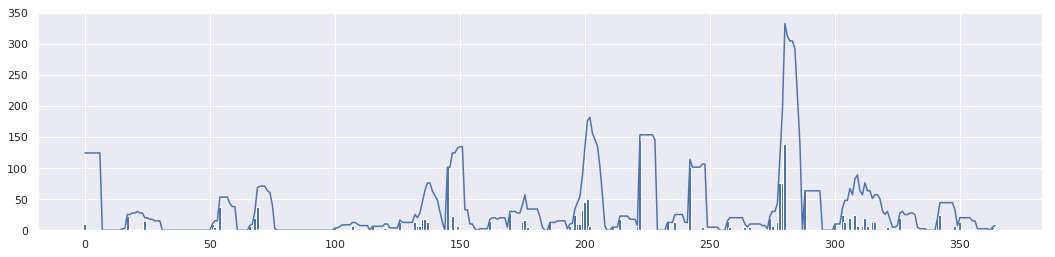

In [234]:
values = plot_year(2010, values)

rain this year: 1700.9mm
rain up to July 1st: 365.6mm


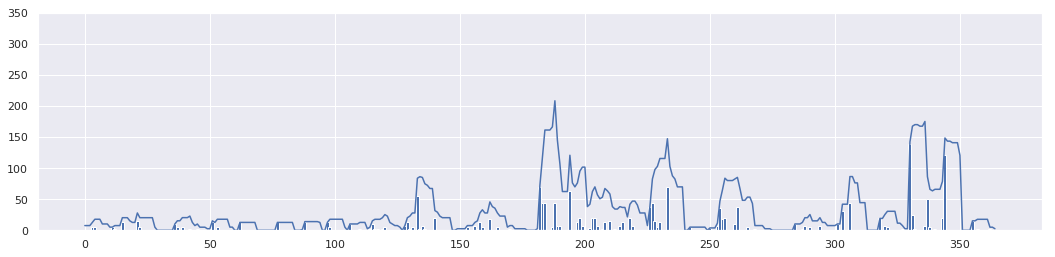

In [235]:
values = plot_year(2011, values)

rain this year: 1122.4mm
rain up to July 1st: 469.9mm


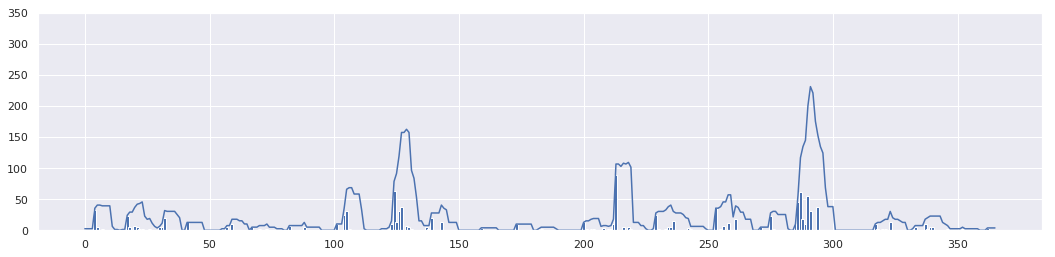

In [236]:
values = plot_year(2012, values)

rain this year: 1040.2mm
rain up to July 1st: 523.0mm


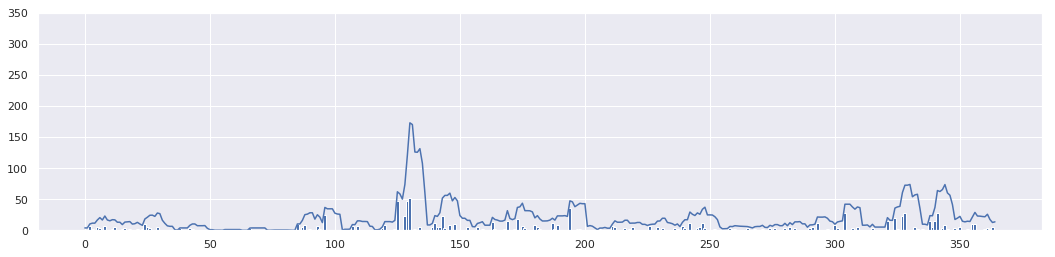

In [237]:
values = plot_year(2013, values)

rain this year: 832.2mm
rain up to July 1st: 295.6mm


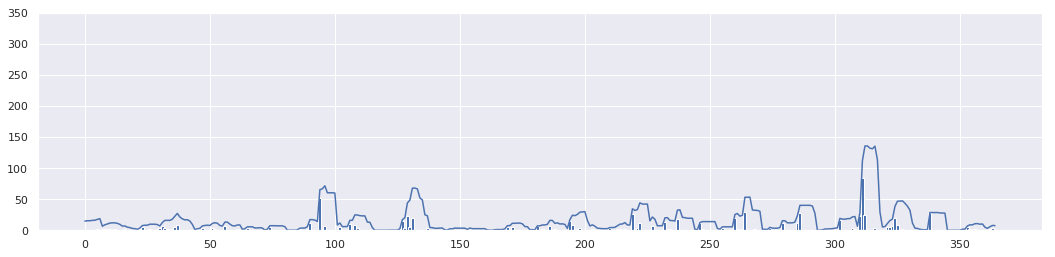

In [238]:
values = plot_year(2014, values)

rain this year: 689.0mm
rain up to July 1st: 223.6mm


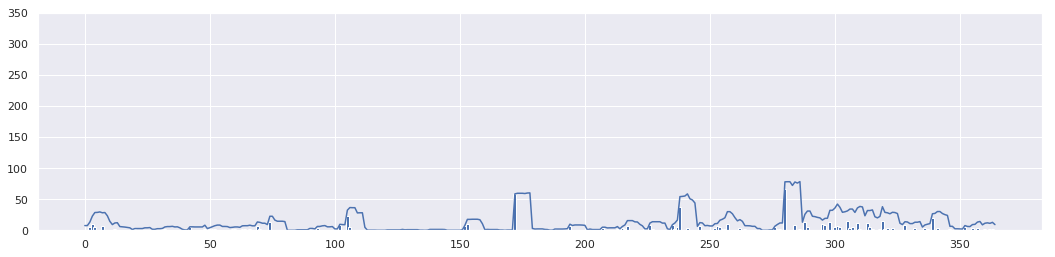

In [239]:
values = plot_year(2015, values)

rain this year: 830.2mm
rain up to July 1st: 267.4mm


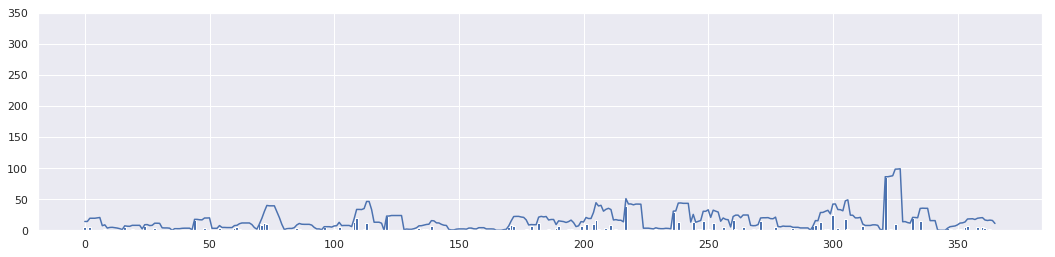

In [240]:
values = plot_year(2016, values)

rain this year: 1106.6mm
rain up to July 1st: 444.4mm


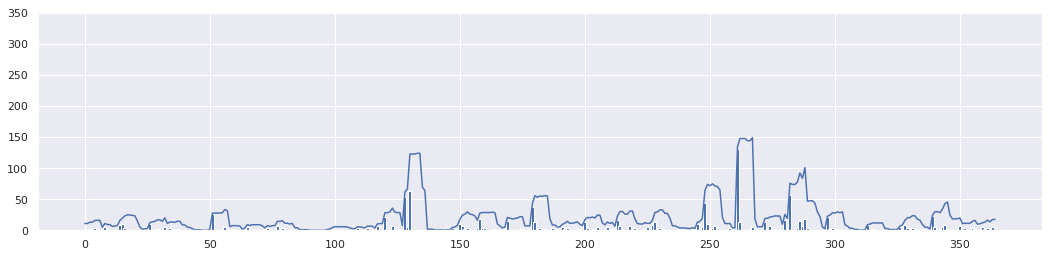

In [241]:
values = plot_year(2017, values)

rain this year: 837.6mm
rain up to July 1st: 250.8mm


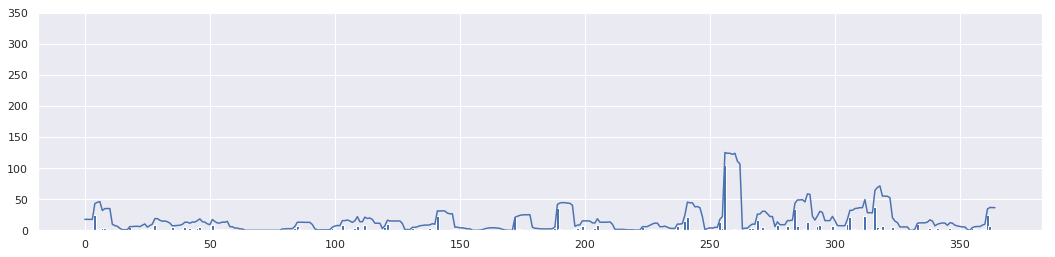

In [242]:
values = plot_year(2018, values)

# missing historic context

in the XVIII century, the island had a quite effective water collecting
installation, still in place, still mostly working.  the collected water
served the now not any more existing lower town, which was a thriving
commercial center in the Caribbean.

the current population is a fraction of what it used to be in the XVIII
century, but it has a larger water demand, and it is mostly located higher
than the old water storage.

the above graphs, and this closing consideration may let you imagine their
difficult situation.